In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qhchina
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def calculate_dot_products(vectors):
    """Calculates dot products between all pairs of vectors.

    Args:
      vectors: A dictionary where keys are labels and values are 2D numpy arrays.

    Returns:
      A dictionary where keys are tuples of labels (e.g., ("风", "水")) and
      values are the corresponding dot products.
    """

    dot_products = {}
    labels = list(vectors.keys())

    for i in range(len(labels)):
        for j in range(len(labels)):
            label1 = labels[i]
            label2 = labels[j]
            dot_products[(label1, label2)] = np.dot(vectors[label1], vectors[label2])

    return dot_products

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def calculate_attention_weights(dot_products, query_label, vectors):
  """Calculates attention weights based on dot products for a given query.

  Args:
    dot_products: A dictionary of dot products.
    query_label: The label of the query vector.
    vectors: A dictionary where keys are labels and values are 2D numpy arrays.

  Returns:
    A dictionary of attention weights where keys are target labels and values
    are the corresponding attention weights.
  """

  query_dot_products = np.array([dot_products[(query_label, target_label)]
                                 for target_label in vectors.keys() if target_label != query_label])

  attention_weights_values = softmax(query_dot_products)

  attention_weights = {}

  i=0
  for target_label in vectors.keys():
    if target_label != query_label:
      attention_weights[target_label] = attention_weights_values[i]
      i+=1

  return attention_weights

def visualize_vectors(vectors, labels):
    """Visualizes 2D vectors with labels for publication.

    Args:
        vectors: A dictionary where keys are labels and values are 2D numpy arrays.
        labels: A list of labels corresponding to the vectors.
    """
    mpl.rcParams['axes.linewidth'] = 1.2
    mpl.rcParams['xtick.major.width'] = 1.2
    mpl.rcParams['ytick.major.width'] = 1.2

    # Create figure with appropriate dimensions
    fig, ax = plt.subplots(figsize=(6, 4.5), dpi=600)
    fig.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)

    # Color scheme
    colors = ['#2F4F4F', '#2F4F4F', '#2F4F4F', '#CB0000']  # Dark slate gray and dark red

    # Repeat origin for each vector
    origin = np.zeros_like(vectors)

    # Plot vectors with improved styling
    ax.quiver(origin[:, 0], origin[:, 1], vectors[:, 0], vectors[:, 1],
              color=colors, scale=1, width=0.008,
              angles='xy', scale_units='xy', zorder=3)

    # Add labels with improved positioning
    label_offset = 0.05  # Offset for better label placement
    for i, (vec, label) in enumerate(zip(vectors, labels)):
        ax.text(vec[0] + np.sign(vec[0])*label_offset,
                vec[1] + np.sign(vec[1])*label_offset,
                label, fontsize=14, zorder=4, color=colors[i],
                ha='center', va='center')

    # Axis limits and styling
    ax.set_xlim([-1, 1])
    ax.set_ylim([0, 1])
    ax.set_aspect('equal')

    # Grid and axes
    ax.grid(True, linestyle=':', linewidth=0.7, alpha=0.5, zorder=-1)
    ax.axhline(y=0, color='k', linewidth=1.2, zorder=0)
    ax.axvline(x=0, color='k', linewidth=1.2, zorder=0)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Save with tight layout
    # plt.savefig("vector_visualization.png", dpi=600, bbox_inches="tight")
    plt.show()

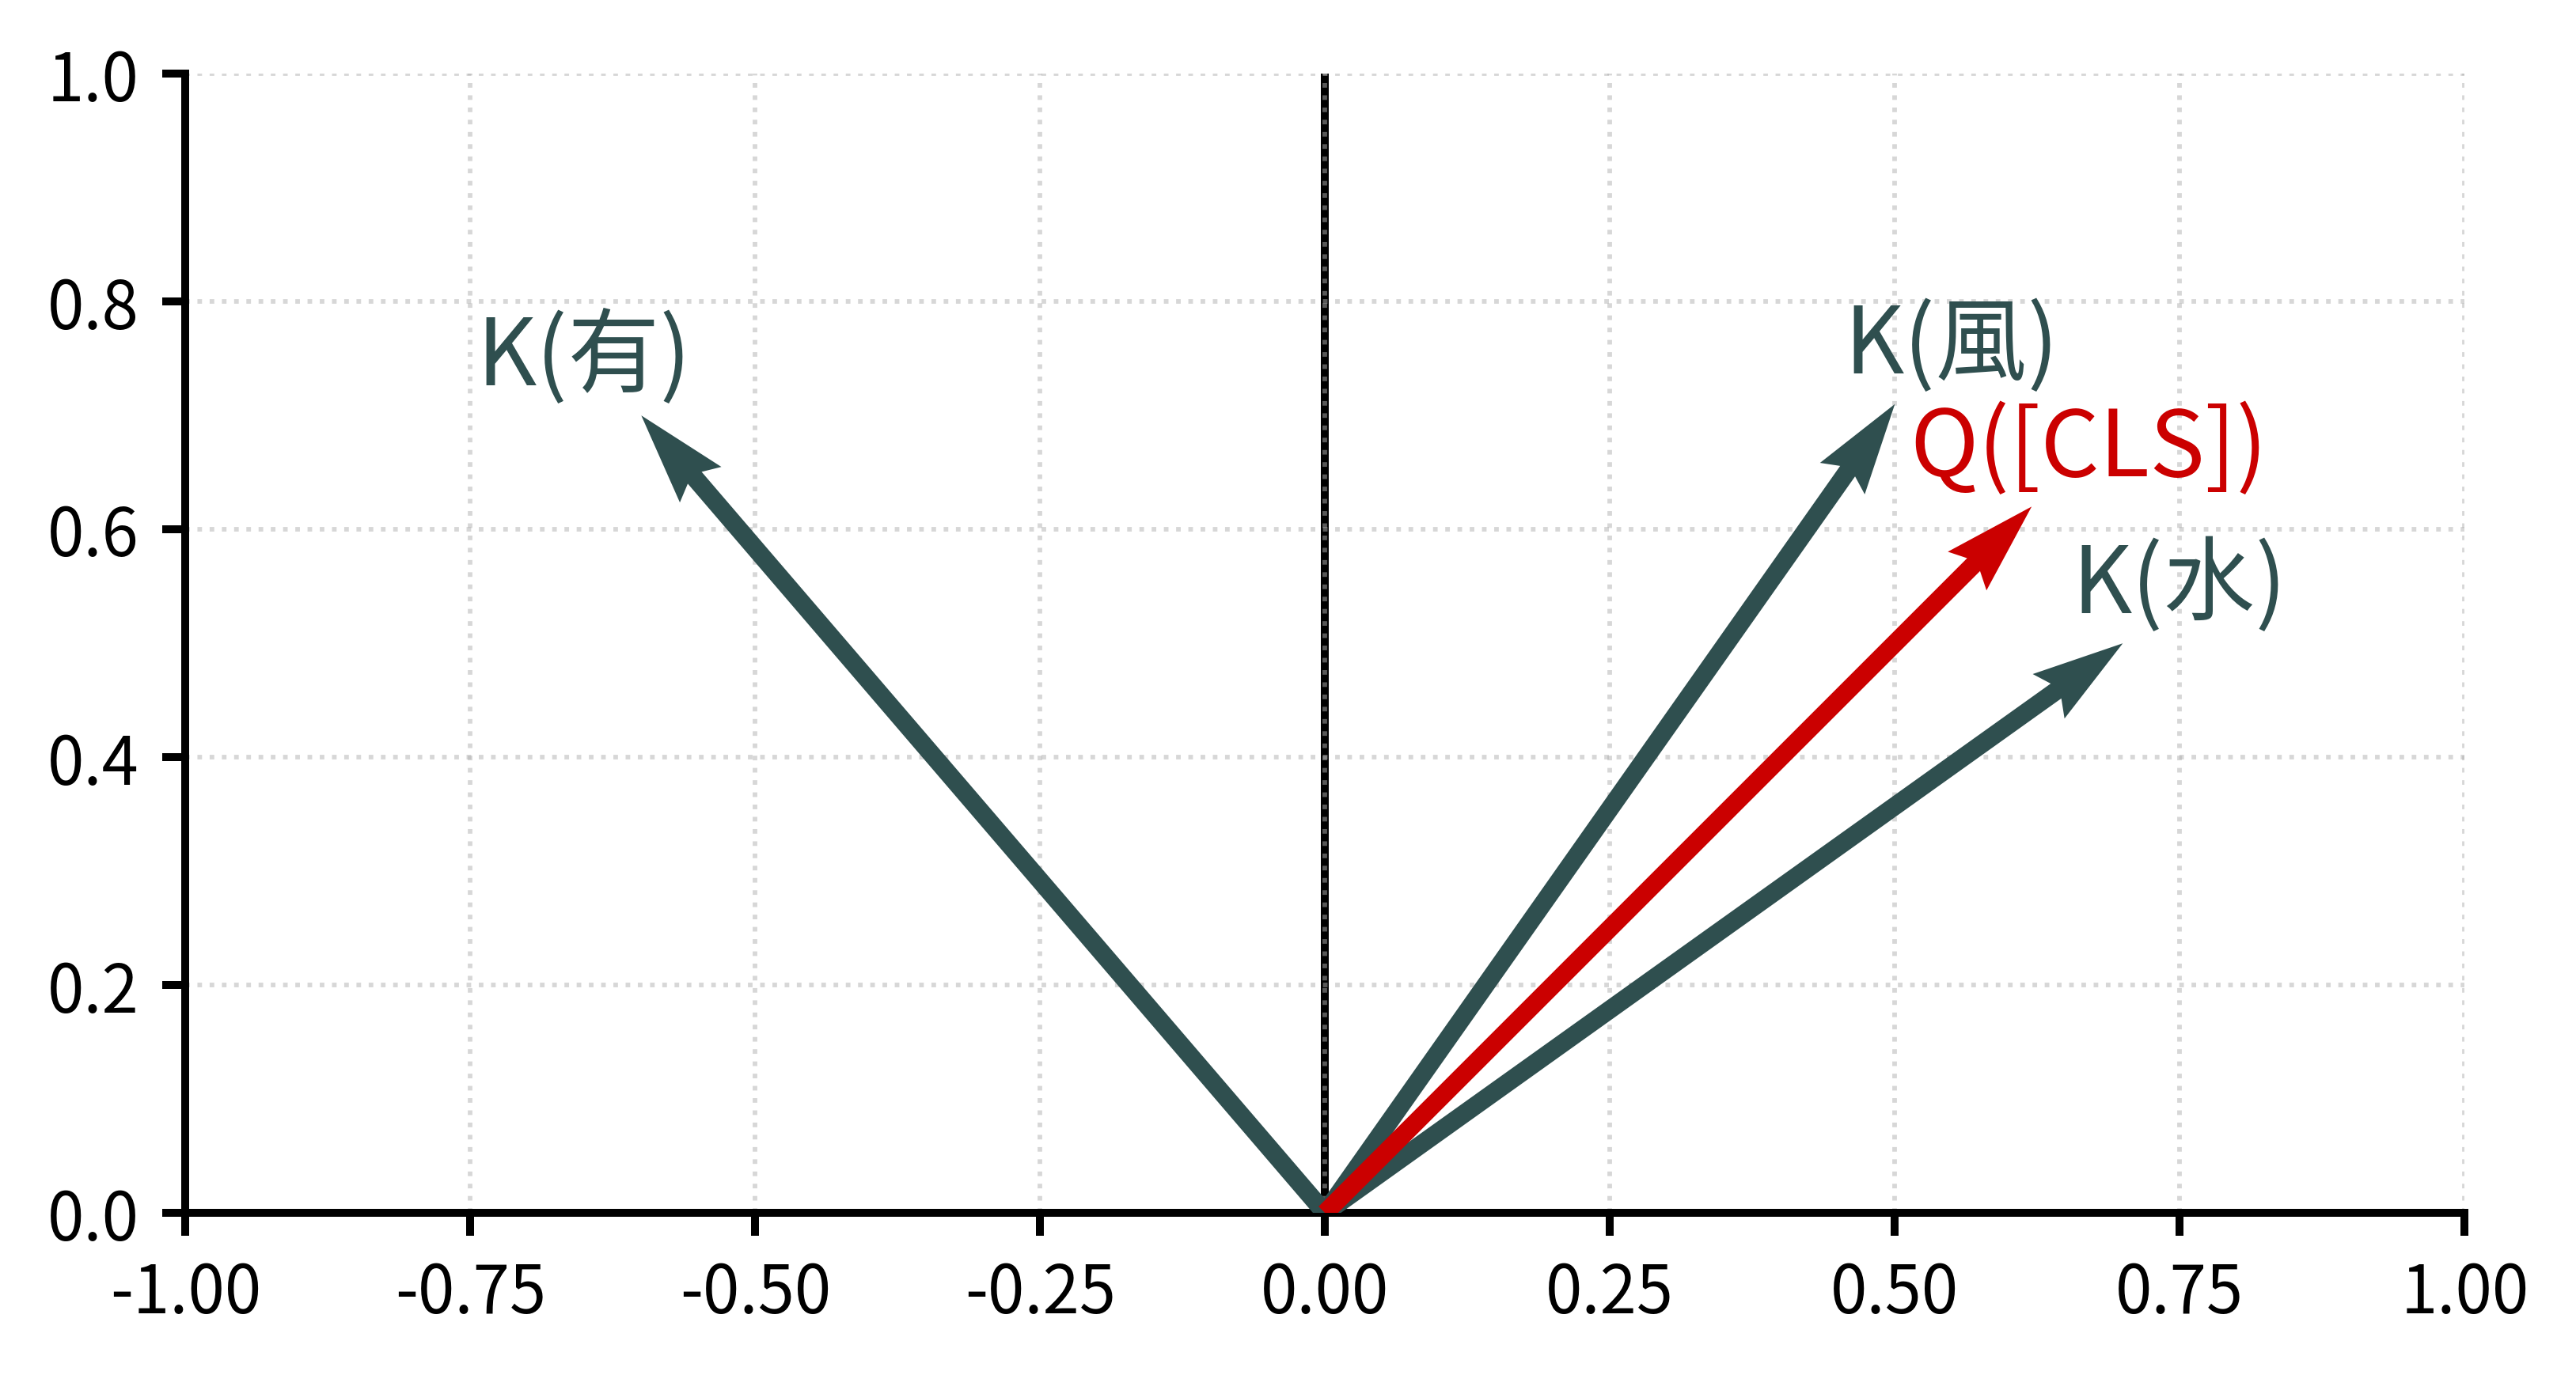

Dot Products:
K(風) . K(風) = 0.75
K(風) . K(水) = 0.70
K(風) . K(有) = 0.20
K(風) . Q([CLS]) = 0.75
K(水) . K(風) = 0.70
K(水) . K(水) = 0.74
K(水) . K(有) = -0.07
K(水) . Q([CLS]) = 0.74
K(有) . K(風) = 0.20
K(有) . K(水) = -0.07
K(有) . K(有) = 0.85
K(有) . Q([CLS]) = 0.06
Q([CLS]) . K(風) = 0.75
Q([CLS]) . K(水) = 0.74
Q([CLS]) . K(有) = 0.06
Q([CLS]) . Q([CLS]) = 0.77

Attention Weights (Query: Q([CLS])):
Attention weight of Q([CLS]) on K(風): 0.40
Attention weight of Q([CLS]) on K(水): 0.40
Attention weight of Q([CLS]) on K(有): 0.20


In [2]:
qhchina.load_fonts()

# Define vectors (representing "query" and "key" embeddings)
vectors = {
    "K(風)": np.array([0.5, 0.71]),  # Wind (right-top)
    "K(水)": np.array([0.7, 0.5]),  # Water (right-top)
    "K(有)": np.array([-0.6, 0.7]), # Have (left-top)
    "Q([CLS])": np.array([0.62, 0.62]), # Have (left-top)
}

# Visualize the vectors
vector_data = np.array(list(vectors.values()))
visualize_vectors(vector_data, list(vectors.keys()))

# Calculate dot products
dot_products_result = calculate_dot_products(vectors)
print("Dot Products:")
for (label1, label2), dot_product in dot_products_result.items():
    print(f"{label1} . {label2} = {dot_product:.2f}")

# Calculate and print attention weights for "Q([CLS])" as the query
attention_weights_wind = calculate_attention_weights(dot_products_result, "Q([CLS])", vectors)
print("\nAttention Weights (Query: Q([CLS])):")
for target_label, weight in attention_weights_wind.items():
    print(f"Attention weight of Q([CLS]) on {target_label}: {weight:.2f}")